# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    y = numpy.sin(x)*x**2
    return y

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
def g(x):
    '''Analytical integral of f(x).'''
    r = 2*x*numpy.sin(x) + numpy.cos(x)*(2-x**2) - 2
    return r


Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    a = g(xmax) - g(xmin)
    return a

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [15]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    dx=(xmax-xmin)/(2*N)
    q = 0
    for i in range(1,2*N,2):
       q += 4*f(xmin + i*dx)
    for i in range(2,2*N-1,2):
       q += 2*f(xmin + i*dx)
    r = (dx/3)*(q + f(xmin)+f(xmax))
    return r
  
    
 

    

Make sure you have implemented Simpson's rule correctly:

In [16]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [17]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Investigation of effect of number of panels on fractional error between numerical result and analytical value')

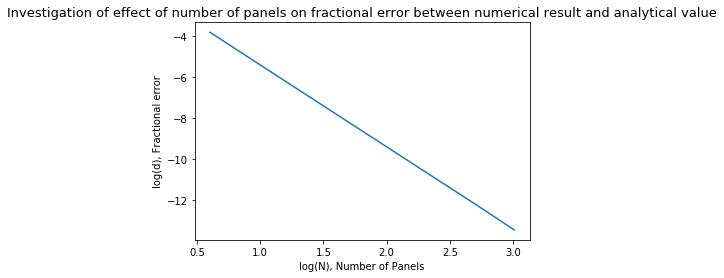

In [22]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
r1=integrate_numeric(0,2,4)
r2=integrate_numeric(0,2,8)
r3=integrate_numeric(0,2,16)
r4=integrate_numeric(0,2,32)
r5=integrate_numeric(0,2,64)
r6=integrate_numeric(0,2,128)
r7=integrate_numeric(0,2,256)
r8=integrate_numeric(0,2,512)
r9=integrate_numeric(0,2,1024)
numerical = [r1,r2,r3,r4,r5,r6,r7,r8,r9]
a = numpy.log10(panel_counts)
b = numpy.log10((abs(numerical - result_analytic) / result_analytic))
plt.plot(a,b)
plt.xlabel("log(N), Number of Panels")
plt.ylabel("log(d), Fractional error")
plt.title('Investigation of effect of number of panels on fractional error between numerical result and analytical value', fontsize=13)


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The error continues to decreaseuntill very large magnitudes of N are used (such as 10 to the 4th power), meaning the accuracy is getting higher. In the case of large N, the error starts to fluctuate up and down (does not steadily decrease) due to the accumulation of rounding error caused by the computer rounding the very small numbers involved whilst handling the operation, which means at this point the accuracy stops improving

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The Trapezium rule accuracy will be lower than that of the Simpsons rule accuracy, but it will still increase accuracy over time just at a slower rate than that of the Simpsons method. 